#Q2

In [2]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

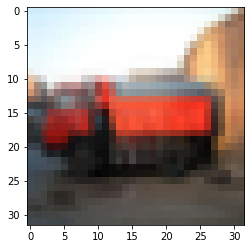

In [ ]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(keras.layers.Flatten())
fc_model.add(keras.layers.Dense(6, activation="relu"))
fc_model.add(keras.layers.Dense(6, activation="relu"))
fc_model.add(keras.layers.Dense(10, activation="softmax"))
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 6)                 18438     
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
Total params: 18,550
Trainable params: 18,550
Non-trainable params: 0
_________________________________________________________________


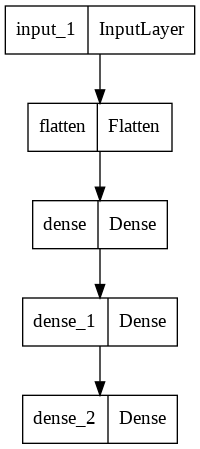

In [ ]:
plot_model(fc_model)

In [ ]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.add(keras.layers.Conv2D(10, kernel_size=(2, 2), activation="relu"))
Conv_model.add(keras.layers.Conv2D(10, kernel_size=(2, 2), activation="relu"))
Conv_model.add(keras.layers.MaxPooling2D(3))
Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(10, activation="softmax"))
Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 10)        130       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 10)        410       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 10)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 10,550
Trainable params: 10,550
Non-trainable params: 0
__________________________________________________

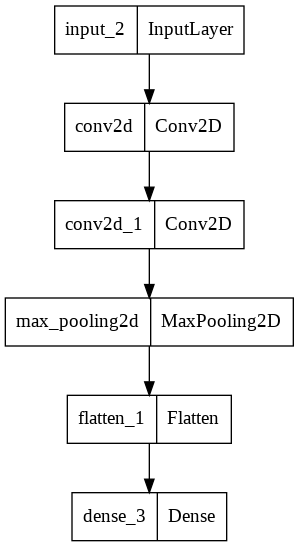

In [ ]:
plot_model(Conv_model)

In [ ]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 7s 3ms/step - loss: 2.3029 - accuracy: 0.1003
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0997
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0987
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0962
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.0978


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1000


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 12s 3ms/step - loss: 1.5051 - accuracy: 0.4671
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2432 - accuracy: 0.5663
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1619 - accuracy: 0.5959
Epoch 4/5
1563/1563 [==

#Q3

In [3]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [5]:
!rm -r sample_data

In [6]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:09<00:00, 63.8MB/s]


In [7]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [8]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [9]:
def resize_img(img, desired_size = 224):
    h, w = img.shape[:2]
    aspect = w / h

    w2 = h2 = desired_size
    topbottom_border = rightleft_border = 0

    if w > h:
        h2 = np.round(w2 / w * h).astype(int)
        topbottom_border = desired_size - h2
    elif h > w:
        w2 = np.round(h2 / h * w).astype(int)
        rightleft_border = desired_size - w2

    new_img = cv2.resize(
        img, 
        (w2, h2),
        # When shrinking its better to use cv2.INTER_AREA and when enlarging its better to use cv2.INTER_CUBIC
        interpolation= cv2.INTER_AREA if h > desired_size or w > desired_size else cv2.INTER_CUBIC
    )

    new_img = cv2.copyMakeBorder(
        new_img, 
        np.floor(topbottom_border / 2).astype(int),
        np.ceil(topbottom_border / 2).astype(int),
        np.floor(rightleft_border / 2).astype(int),
        np.ceil(rightleft_border / 2).astype(int),
        borderType=cv2.BORDER_CONSTANT,
        value=(0, 0, 0)        
    )

    return new_img

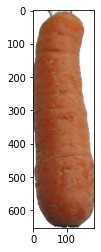

In [10]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

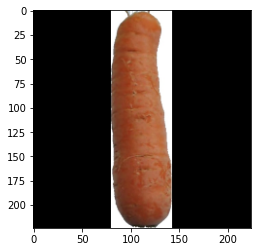

In [11]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [12]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weights

In [64]:
# YOU CAN CHANGE IT
EPOCHS = 15

In [65]:
resnet = tf.keras.models.Sequential()

from tensorflow.keras.applications.resnet50 import ResNet50
resnet.add(ResNet50(weights=None, classes=24))

resnet.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 24)                23636888  
                                                                 
Total params: 23,636,888
Trainable params: 23,583,768
Non-trainable params: 53,120
_________________________________________________________________


In [66]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [73]:
resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/15
65/65 [==============================] - 70s 992ms/step - loss: 0.6972 - acc: 0.7930
Epoch 2/15
65/65 [==============================] - 68s 1s/step - loss: 0.1316 - acc: 0.9592
Epoch 3/15
65/65 [==============================] - 68s 1s/step - loss: 0.0428 - acc: 0.9868
Epoch 4/15
65/65 [==============================] - 68s 1s/step - loss: 0.0787 - acc: 0.9746
Epoch 5/15
65/65 [==============================] - 68s 1s/step - loss: 0.0853 - acc: 0.9745
Epoch 6/15
65/65 [==============================] - 68s 1s/step - loss: 0.0481 - acc: 0.9883
Epoch 7/15
65/65 [==============================] - 68s 1s/step - loss: 0.1501 - acc: 0.9552
Epoch 8/15
65/65 [==============================] - 68s 1s/step - loss: 0.0127 - acc: 0.9970
Epoch 9/15
65/65 [==============================] - 68s 1s/step - loss: 0.0175 - acc: 0.9958
Epoch 10/15
65/65 [==============================] - 68s 1s/step - loss: 0.0044 - acc: 0.9989
Epoch 11/15
65/65 [==============================] - 68s 1s/step -

## C : Fine-tune Resnet50 on fruits dataset.

In [70]:
fine_tune_resnet = tf.keras.models.Sequential()

original_resnet = ResNet50(weights="imagenet", classes=1000, include_top=False)

for layer in original_resnet.layers[:]:
    layer.trainable = False

fine_tune_resnet.add(original_resnet)
fine_tune_resnet.add(keras.layers.GlobalAveragePooling2D())
fine_tune_resnet.add(keras.layers.Dense(150, activation="relu"))
fine_tune_resnet.add(keras.layers.Dense(24, activation="softmax"))


fine_tune_resnet.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_26 (Dense)            (None, 150)               307350    
                                                                 
 dense_27 (Dense)            (None, 24)                3624      
                                                                 
Total params: 23,898,686
Trainable params: 310,974
Non-trainable params: 23,587,712
_________________________________________________________________


In [71]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [72]:
fine_tune_resnet.fit(train_generator, epochs=EPOCHS)

Epoch 1/15
65/65 [==============================] - 36s 515ms/step - loss: 2.9140 - acc: 0.1441
Epoch 2/15
65/65 [==============================] - 34s 521ms/step - loss: 2.4459 - acc: 0.3202
Epoch 3/15
65/65 [==============================] - 34s 523ms/step - loss: 2.0355 - acc: 0.4523
Epoch 4/15
65/65 [==============================] - 34s 521ms/step - loss: 1.6876 - acc: 0.5922
Epoch 5/15
65/65 [==============================] - 35s 541ms/step - loss: 1.4134 - acc: 0.6729
Epoch 6/15
65/65 [==============================] - 34s 523ms/step - loss: 1.2030 - acc: 0.7188
Epoch 7/15
65/65 [==============================] - 34s 520ms/step - loss: 1.0473 - acc: 0.7468
Epoch 8/15
65/65 [==============================] - 34s 524ms/step - loss: 0.9167 - acc: 0.7772
Epoch 9/15
65/65 [==============================] - 34s 523ms/step - loss: 0.8116 - acc: 0.8100
Epoch 10/15
65/65 [==============================] - 35s 541ms/step - loss: 0.7289 - acc: 0.8209
Epoch 11/15
65/65 [====================

## Test models

In [74]:
resnet.evaluate(test_generator)

33/33 [==============================] - 17s 487ms/step - loss: 3.6954e-05 - acc: 1.0000


[3.695361010613851e-05, 1.0]

In [75]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 18s 508ms/step - loss: 0.4422 - acc: 0.8907


[0.44219139218330383, 0.8906752467155457]